# Percentage of Immigration by neighborhood

Code to generate a dataset with the percentage of residents of Barcelona's neighborhoods that have been born outside of Spain.

Data from 2025:

In [1]:
# import libraries
import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
# read csv
path_barris = '../data_original/Codigo_valores/BarcelonaCiutat_Barris.csv'
df = pd.read_csv(path_barris)

# read csv from immigrant data
path_immigrant = '../data/merged_data/merged_birthPlace_spain_v_outside.csv'
df_immigrant = pd.read_csv(path_immigrant)
df_immigrant['Value'] = pd.to_numeric(df_immigrant['Value'], errors='coerce').fillna(0).astype(int)
df_immigrant['Birth_Place'] = df_immigrant['Birth_Place'].astype(str).str.strip()
# get data from 2025 only
df_immigrant_2025 = df_immigrant[df_immigrant['Year_Reference'] == 2025]

# total population by neighborhood
total = df_immigrant_2025.groupby(['District', 'Neighborhood'], as_index=False)['Value'].sum().rename(columns={'Value':'total_population'})

# population from Rest of European Union and Rest of World
eu = df_immigrant_2025[df_immigrant_2025['Birth_Place'] == 'Rest of European Union'].groupby(['District','Neighborhood'], as_index=False)['Value'].sum().rename(columns={'Value':'eu_population'})
world = df_immigrant_2025[df_immigrant_2025['Birth_Place'] == 'Rest of World'].groupby(['District','Neighborhood'], as_index=False)['Value'].sum().rename(columns={'Value':'world_population'})

# combine
summary = total.merge(eu, on=['District','Neighborhood'], how='left').merge(world, on=['District','Neighborhood'], how='left').fillna(0)
summary['outside_spain'] = summary['eu_population'] + summary['world_population']
# Calculate population from Spain
summary['spain_population'] = summary['total_population'] - summary['outside_spain']
# reorder columns
summary = summary[['District', 'Neighborhood', 'total_population', 'spain_population', 'outside_spain', 'eu_population', 'world_population']]
# Percentage of population from outside Spain
summary['pct_outside_spain'] = (summary['outside_spain'] / summary['total_population'] * 100).round(2)


# save and inspect
summary.to_csv('../data/processed/neighborhood_population_summary_2025.csv', index=False)
print(summary.head())



       District                           Neighborhood  total_population  \
0  Ciutat Vella  Sant Pere, Santa Caterina i la Ribera             22755   
1  Ciutat Vella                         el Barri Gòtic             27863   
2  Ciutat Vella                               el Raval             49889   
3  Ciutat Vella                         la Barceloneta             14741   
4      Eixample                            Sant Antoni             39207   

   spain_population  outside_spain  eu_population  world_population  \
0              9273          13482           3384             10098   
1              6765          21098           2556             18542   
2             17183          32706           3848             28858   
3              6803           7938           2056              5882   
4             24197          15010           2585             12425   

   pct_outside_spain  
0              59.25  
1              75.72  
2              65.56  
3              53.85  
4

Generate map:

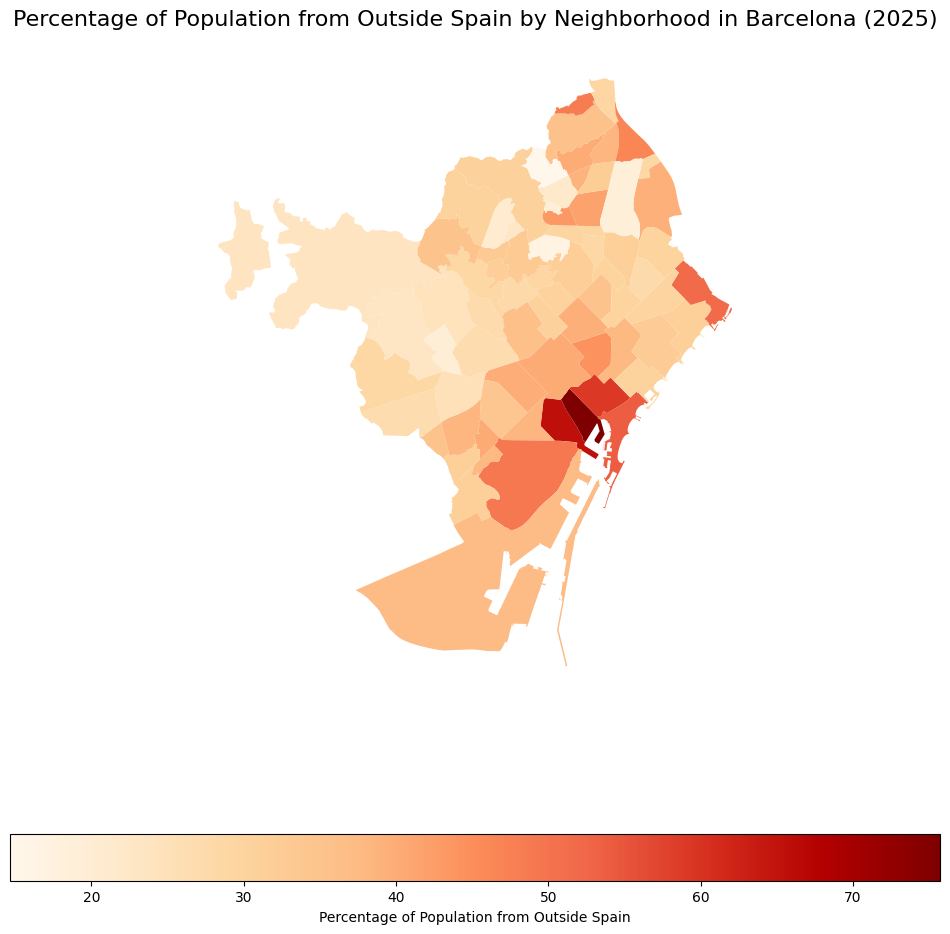

In [2]:
# convert WKT strings to geometry objects
df["geometria_etrs89"] = df["geometria_etrs89"].apply(wkt.loads)   # or gpd.GeoSeries.from_wkt(df["geometry"])
# create GeoDataFrame and set the correct ETRS89 CRS
# Choose the right EPSG: EPSG:4258 for geographic ETRS89 (lat/lon),
# EPSG:25831 for ETRS89 / UTM zone  31N (meters) — choose one that matches your coordinates
gdf = gpd.GeoDataFrame(df, geometry="geometria_etrs89", crs="EPSG:25831")
# merge with summary data
gdf_summary = gdf.merge(summary, left_on=['nom_districte', 'nom_barri'], right_on=['District', 'Neighborhood'], how='left')
# plot percentage of population from outside Spain
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
gdf_summary.plot(column='pct_outside_spain', ax=ax, legend=True, cmap='OrRd', 
                 legend_kwds={'label': "Percentage of Population from Outside Spain", 'orientation': "horizontal"})
ax.set_title('Percentage of Population from Outside Spain by Neighborhood in Barcelona (2025)', fontsize=16)
ax.axis('off')
plt.show()

Data from 2015:

In [3]:
# read csv
path_barris = '../data_original/Codigo_valores/BarcelonaCiutat_Barris.csv'
df = pd.read_csv(path_barris)

# read csv from immigrant data
path_immigrant = '../data/merged_data/merged_birthPlace_spain_v_outside.csv'
df_immigrant = pd.read_csv(path_immigrant)
df_immigrant['Value'] = pd.to_numeric(df_immigrant['Value'], errors='coerce').fillna(0).astype(int)
df_immigrant['Birth_Place'] = df_immigrant['Birth_Place'].astype(str).str.strip()
# get data from 2015 only
df_immigrant_2015 = df_immigrant[df_immigrant['Year_Reference'] == 2015]

# total population by neighborhood
total = df_immigrant_2015.groupby(['District', 'Neighborhood'], as_index=False)['Value'].sum().rename(columns={'Value':'total_population'})

# population from Rest of European Union and Rest of World
eu = df_immigrant_2015[df_immigrant_2015['Birth_Place'] == 'Rest of European Union'].groupby(['District','Neighborhood'], as_index=False)['Value'].sum().rename(columns={'Value':'eu_population'})
world = df_immigrant_2015[df_immigrant_2015['Birth_Place'] == 'Rest of World'].groupby(['District','Neighborhood'], as_index=False)['Value'].sum().rename(columns={'Value':'world_population'})

# combine
summary = total.merge(eu, on=['District','Neighborhood'], how='left').merge(world, on=['District','Neighborhood'], how='left').fillna(0)
summary['outside_spain'] = summary['eu_population'] + summary['world_population']
# Calculate population from Spain
summary['spain_population'] = summary['total_population'] - summary['outside_spain']
# reorder columns
summary = summary[['District', 'Neighborhood', 'total_population', 'spain_population', 'outside_spain', 'eu_population', 'world_population']]
# Percentage of population from outside Spain
summary['pct_outside_spain'] = (summary['outside_spain'] / summary['total_population'] * 100).round(2)


# save and inspect
summary.to_csv('../data/processed/neighborhood_population_summary_2015.csv', index=False)
print(summary.head())


       District                           Neighborhood  total_population  \
0  Ciutat Vella  Sant Pere, Santa Caterina i la Ribera             22456   
1  Ciutat Vella                         el Barri Gòtic             15508   
2  Ciutat Vella                               el Raval             47135   
3  Ciutat Vella                         la Barceloneta             15036   
4      Eixample                            Sant Antoni             38016   

   spain_population  outside_spain  eu_population  world_population  \
0             12164          10292           3402              6890   
1              7986           7522           2587              4935   
2             20679          26456           3779             22677   
3              9561           5475           1895              3580   
4             28226           9790           2285              7505   

   pct_outside_spain  
0              45.83  
1              48.50  
2              56.13  
3              36.41  
4

Generate the map:

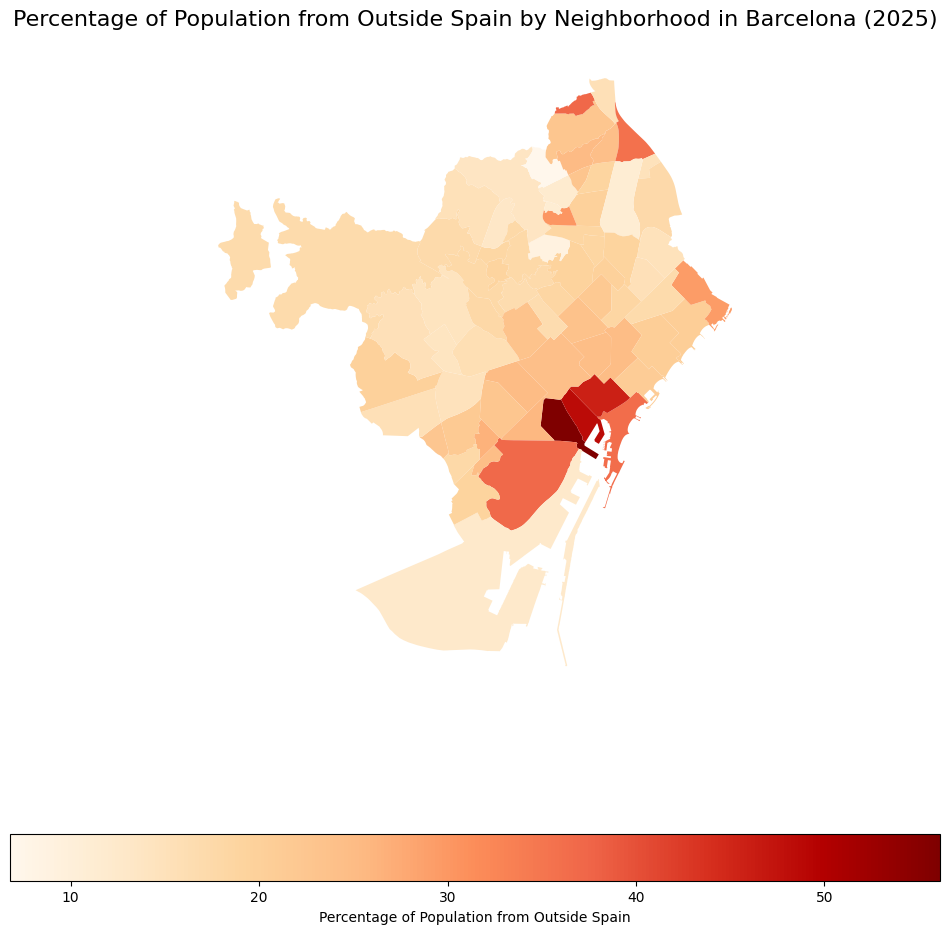

In [4]:
# convert WKT strings to geometry objects
df["geometria_etrs89"] = df["geometria_etrs89"].apply(wkt.loads)   # or gpd.GeoSeries.from_wkt(df["geometry"])
# create GeoDataFrame and set the correct ETRS89 CRS
# Choose the right EPSG: EPSG:4258 for geographic ETRS89 (lat/lon),
# EPSG:25831 for ETRS89 / UTM zone  31N (meters) — choose one that matches your coordinates
gdf = gpd.GeoDataFrame(df, geometry="geometria_etrs89", crs="EPSG:25831")
# merge with summary data
gdf_summary = gdf.merge(summary, left_on=['nom_districte', 'nom_barri'], right_on=['District', 'Neighborhood'], how='left')
# plot percentage of population from outside Spain
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
gdf_summary.plot(column='pct_outside_spain', ax=ax, legend=True, cmap='OrRd', 
                 legend_kwds={'label': "Percentage of Population from Outside Spain", 'orientation': "horizontal"})
ax.set_title('Percentage of Population from Outside Spain by Neighborhood in Barcelona (2025)', fontsize=16)
ax.axis('off')
plt.show()